# Data Scientist Nonodegree Project 1: Write a Data Science Blog Post

## Analyze Melbourne Housing Data 
In this project, we were using Melbourne Housing Data from 2016 to 2018 from [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market). The data contains a lot of missing values and wrong inputs that we need to deal with first.
There are multiple questions we are going to answer. by analyzing and visualizing the data that will be presented in order to answer each question. then we will build a supervised machine learning algorithm linear regression model to predict the price. 

### Questions: 
1. What are the most Real Estate Agents selling?
2. What is the most Suburb sold in Melbourne?
3. Does Type h (house) are the most selling in Melbourne and what Type has the highest average price?
4. What is the Region that has the majority of the sold houses? and does the most selling Region have the highest prices?
5. Is there year-over-year growth in the average price?
6. What is the period that have the highest record of selling?
7. Is there a correlation between the price and the Distance?

### Data Wrangling 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
print("We have {} Attributes and {} Records.".format(df.shape[1], df.shape[0]))

We have 21 Attributes and 34857 Records.


In [4]:
# The columns that we have in the dataset.
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

We could notice that the data set has a lot of null e.g. in Price, Bedroom, Bathroom also the data type must be changed.

In [6]:
df.select_dtypes(["object"]).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

#### Changing the data types

In [7]:
df['Suburb'] = df['Suburb'].astype("category")
df['Type'] = df['Type'].astype("category")
df['Method'] = df['Method'].astype("category")
df['SellerG'] = df['SellerG'].astype("category")
df['CouncilArea'] = df['CouncilArea'].astype("category")
df['Regionname'] = df['Regionname'].astype("category")
df['Postcode'] = df['Postcode'].astype("category")
df['Propertycount'] = df['Propertycount'].astype("category")

changing All the string (object) **except Address & Date** and the Postcode as well, since it's not considered numeric or integer into categorical

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

Chaning the Date to Date Time 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

#### Checking the data types
Note: Some variables have incorrect data type is can not be changed because it contains a null value, so its will be changing after we remove the nulls.

#### Checking the numerice data and convert it to real number

In [10]:
pd.options.display.float_format = "{:.2f}".format

In [11]:
df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,34857.00,27247.00,34856.00,26640.00,26631.00,26129.00,23047.00,13742.00,15551.00,26881.00,26881.00
mean,3.03,1050173.34,11.18,3.08,1.62,1.73,593.60,160.26,1965.29,-37.81,145.00
std,0.97,641467.13,6.79,0.98,0.72,1.01,3398.84,401.27,37.33,0.09,0.12
min,1.00,85000.00,0.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.19,144.42
25%,2.00,635000.00,6.40,2.00,1.00,1.00,224.00,102.00,1940.00,-37.86,144.93
50%,3.00,870000.00,10.30,3.00,2.00,2.00,521.00,136.00,1970.00,-37.81,145.01
75%,4.00,1295000.00,14.00,4.00,2.00,2.00,670.00,188.00,2000.00,-37.75,145.07
max,16.00,11200000.00,48.10,30.00,12.00,26.00,433014.00,44515.00,2106.00,-37.39,145.53


- We could notice that there is an entry error in YearBuilt the value 2106 and we will change it to 2016.
- Also, we want to make sure if the Price has an outlier since the average price is 1,050,173 and the maximum is 11,200,000 which is much higher than the mean and the minimum is 85,000 which is also much lower for the mean. As well as the Rooms, Bathroom, Bedroom2, and Car.
- And after carefully evaluating data, it can be noticed that variables "Rooms" and "Bedroom2" are pretty much similar and one of the columns has a lot of null values.

#### Have deep investigation of the incorrect data and check the outliers 

In [12]:
df.loc[df['YearBuilt'] == 2106]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,nan,SP,Ray,2016-07-11,11.80,3105.00,...,2.00,2.00,729.00,255.00,2106.00,Manningham City Council,-37.76,145.09,Eastern Metropolitan,4480.00


In [13]:
df['YearBuilt'].replace([2106], 2016, inplace = True) 

In [14]:
df.loc[2453]

Suburb                           Bulleen
Address                     3 Maringa St
Rooms                                  4
Type                                   h
Price                                NaN
Method                                SP
SellerG                              Ray
Date                 2016-07-11 00:00:00
Distance                           11.80
Postcode                         3105.00
Bedroom2                            4.00
Bathroom                            2.00
Car                                 2.00
Landsize                          729.00
BuildingArea                      255.00
YearBuilt                        2016.00
CouncilArea      Manningham City Council
Lattitude                         -37.76
Longtitude                        145.09
Regionname          Eastern Metropolitan
Propertycount                    4480.00
Name: 2453, dtype: object

Change the value **2106** to **2016**

In [15]:
df.loc[df['Price'] == 11200000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
25635,Brighton,6 Cole St,4,h,11200000.00,VB,hockingstuart,2017-10-28,10.50,3186.00,...,3.00,2.00,1400.00,nan,nan,Bayside City Council,-37.89,144.99,Southern Metropolitan,10579.00


In [16]:
df.loc[df['Price'] == 85000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4378,Footscray,202/51 Gordon St,1,u,85000.00,PI,Burnham,2016-03-09,6.40,3011.00,...,1.00,0.00,0.00,nan,2007.00,Maribyrnong City Council,-37.79,144.89,Western Metropolitan,7570.00


In [17]:
df.loc[df['Price'] >= 5000000].count()

Suburb           60
Address          60
Rooms            60
Type             60
Price            60
Method           60
SellerG          60
Date             60
Distance         60
Postcode         60
Bedroom2         45
Bathroom         45
Car              45
Landsize         36
BuildingArea     25
YearBuilt        29
CouncilArea      60
Lattitude        45
Longtitude       45
Regionname       60
Propertycount    60
dtype: int64

In [18]:
df.loc[df['Price'] < 100000].count()

Suburb           1
Address          1
Rooms            1
Type             1
Price            1
Method           1
SellerG          1
Date             1
Distance         1
Postcode         1
Bedroom2         1
Bathroom         1
Car              1
Landsize         1
BuildingArea     0
YearBuilt        1
CouncilArea      1
Lattitude        1
Longtitude       1
Regionname       1
Propertycount    1
dtype: int64

We could see that there are only **60** values (*0.22%* of the data) that the prices are more than or equal to **5 million**. And there is only **1** value that the price is less than 100K.

In [19]:
df.loc[df['Bathroom'] >= 10 ]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,nan,PI,Ross,2016-08-10,11.70,3125.00,...,12.00,0.00,946.00,nan,1950.00,Monash City Council,-37.85,145.11,Southern Metropolitan,5678.00


We can see that there are 3 rooms with 12 bathrooms which doesn't make sense, especially when it comes to a house. And also it has a lot of nulls. 

In [20]:
df.loc[df['Rooms'] > 10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8309,Preston,12 Lyonsville Av,12,h,nan,SN,Barry,2016-08-28,8.80,3072.00,...,nan,nan,nan,nan,nan,Darebin City Council,nan,nan,Northern Metropolitan,14577.00
12959,Hawthorn,10 Berkeley St,12,h,4700000.00,PI,Property,2017-05-20,4.60,3122.00,...,nan,nan,nan,nan,nan,Boroondara City Council,-37.83,145.04,Southern Metropolitan,11308.00
26210,Mitcham,20 Harrison St,16,h,5000000.00,S,Buxton,2017-10-28,17.20,3132.00,...,8.00,8.00,nan,nan,nan,Whitehorse City Council,-37.81,145.20,Eastern Metropolitan,6871.00
27150,Melton,213 Station Rd,12,h,710000.00,S,PRDNationwide,2017-11-11,31.70,3337.00,...,5.00,3.00,960.00,223.00,1970.00,Melton City Council,-37.69,144.58,Western Victoria,3600.00


This one will consider as an outlier since the average is 3 and the 3rd quartile is 4!

In [21]:
df['Diff_Room'] = df['Bedroom2'] - df['Rooms']
df[['Bedroom2', 'Rooms', 'Diff_Room']].sample(10)

,Bedroom2,Rooms,Diff_Room
34349,3.00,3,0.00
13845,3.00,3,0.00
30191,3.00,3,0.00
11582,1.00,1,0.00
24427,4.00,4,0.00
5911,4.00,4,0.00
177,1.00,1,0.00
13398,3.00,3,0.00
23822,nan,3,nan
25017,5.00,5,0.00


We can see that there are not many differences between them, So it better to remove or fill it. But since it is from a different source then we could assume that a lot of people didn't fill it in because they already do! So we will fill the Bedroom2 by Rooms as well as the **zero values**.

In [22]:
df["Bedroom2"].fillna(df["Rooms"], inplace=True)
df['Bedroom2'] = np.where(df['Bedroom2'] == 0, df['Rooms'], df['Bedroom2'])
df[['Bedroom2', 'Rooms']].sample(10)

,Bedroom2,Rooms
6175,2.00,2
5828,3.00,3
5134,3.00,3
26636,3.00,3
33431,4.00,4
8054,2.00,2
25818,3.00,3
32779,2.00,2
27288,1.00,1
21812,3.00,3


In [23]:
# Drop the new columns 
df.drop(columns='Diff_Room', axis=1, inplace=True)

In [24]:
# Check the null values 
df.isnull().mean().sort_values(ascending=False)

BuildingArea    0.61
YearBuilt       0.55
Landsize        0.34
Car             0.25
Bathroom        0.24
Longtitude      0.23
Lattitude       0.23
Price           0.22
Propertycount   0.00
CouncilArea     0.00
Regionname      0.00
Postcode        0.00
Distance        0.00
Address         0.00
Rooms           0.00
Type            0.00
Bedroom2        0.00
Method          0.00
SellerG         0.00
Date            0.00
Suburb          0.00
dtype: float64

In [25]:
#Since our target is Price, we will drop all null values for Price. 
df.dropna(subset=["Price"], inplace=True)

In [26]:
df.isnull().mean().sort_values(ascending=False)

BuildingArea    0.61
YearBuilt       0.56
Landsize        0.34
Car             0.25
Bathroom        0.24
Longtitude      0.23
Lattitude       0.23
Propertycount   0.00
CouncilArea     0.00
Regionname      0.00
Postcode        0.00
Distance        0.00
Price           0.00
Address         0.00
Rooms           0.00
Type            0.00
Bedroom2        0.00
Method          0.00
SellerG         0.00
Date            0.00
Suburb          0.00
dtype: float64

Still after we removed the null value for price the percentage didn't change So first we will drop the **BuildingArea** since it has more than *60%* of the data is null!. But for **Landsize** and **YearBuilt** we can deal with them, so we will see the null percentage after we removed BuildingArea.

In [27]:
df.drop(columns=['BuildingArea'], axis=1, inplace=True)

In [28]:
df.isnull().mean().sort_values(ascending=False)

YearBuilt       0.56
Landsize        0.34
Car             0.25
Bathroom        0.24
Longtitude      0.23
Lattitude       0.23
Propertycount   0.00
Regionname      0.00
CouncilArea     0.00
Distance        0.00
Postcode        0.00
Bedroom2        0.00
Date            0.00
SellerG         0.00
Method          0.00
Price           0.00
Type            0.00
Rooms           0.00
Address         0.00
Suburb          0.00
dtype: float64

In [29]:
#df.dropna(subset=["YearBuilt"], inplace=True)

In [30]:
# For the YearBuilt, we will convert it into dummy variables to see how our model will perform.
df['YearBuilt'] = np.where(df['YearBuilt'].isnull(),0,1)

In [31]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,2016-03-12,2.50,3067.00,2.00,1.00,1.00,202.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,2016-04-02,2.50,3067.00,2.00,1.00,0.00,156.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,2017-04-03,2.50,3067.00,3.00,2.00,0.00,134.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,2017-04-03,2.50,3067.00,3.00,2.00,1.00,94.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,2016-04-06,2.50,3067.00,3.00,1.00,2.00,120.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,2018-02-24,6.30,3013.00,4.00,1.00,3.00,593.00,0,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,2018-02-24,6.30,3013.00,2.00,2.00,1.00,98.00,1,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,2018-02-24,6.30,3013.00,2.00,1.00,2.00,220.00,1,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,2018-02-24,6.30,3013.00,3.00,nan,nan,nan,0,Maribyrnong City Council,nan,nan,Western Metropolitan,6543.00


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27247 non-null  category      
 1   Address        27247 non-null  object        
 2   Rooms          27247 non-null  int64         
 3   Type           27247 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         27247 non-null  category      
 6   SellerG        27247 non-null  category      
 7   Date           27247 non-null  datetime64[ns]
 8   Distance       27246 non-null  float64       
 9   Postcode       27246 non-null  category      
 10  Bedroom2       27247 non-null  float64       
 11  Bathroom       20800 non-null  float64       
 12  Car            20423 non-null  float64       
 13  Landsize       17982 non-null  float64       
 14  YearBuilt      27247 non-null  int32         
 15  CouncilArea    2724

We want to find out which house has null in **Distance** and **Postcode** and I found out it has a lot of nulls in all the variables.

In [33]:
 df.loc[df.Distance.isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.00,SP,Brad,2018-06-01,nan,nan,3.00,nan,nan,nan,0,NaN,nan,nan,NaN,nan


In [34]:
df.dropna(subset=['Distance'], axis = 0, inplace=True)

In [35]:
df.Bathroom.value_counts()

1.00    10527
2.00     8464
3.00     1537
4.00      176
5.00       46
0.00       34
6.00       10
8.00        3
7.00        2
9.00        1
Name: Bathroom, dtype: int64

In [36]:
df.Car.value_counts() 

2.00     9367
1.00     7400
0.00     1251
3.00     1234
4.00      907
5.00      113
6.00      105
7.00       19
8.00       18
10.00       5
9.00        2
11.00       1
18.00       1
Name: Car, dtype: int64

In [37]:
#df['Landsize'] = np.where(df['Landsize'].isnull(),0,1)
df.Landsize.value_counts()

0.00        1942
650.00       161
697.00        97
585.00        74
534.00        70
            ... 
42800.00       1
1468.00        1
1276.00        1
2422.00        1
2581.00        1
Name: Landsize, Length: 1557, dtype: int64

In [38]:
# So the best way to impute / replace the null values in Car & Bathroom is with the mode 
# since its logical and represnt 35% of the data.
df['Car'].fillna(df['Car'].mode()[0], inplace=True)
df['Bathroom'].fillna(df.Bathroom.mode()[0], inplace=True)
# and the best way to impute the null value in Landsize is the mean
df['Landsize'].fillna(df.Landsize.mean(), inplace=True)

In [39]:
df['Landsize'] = np.where(df['Landsize'] == 0,df.Landsize.median(),df.Landsize)

In [40]:
df.Landsize.value_counts()

593.49     11206
650.00       161
697.00        97
585.00        74
534.00        70
           ...  
1218.00        1
3806.00        1
1350.00        1
2120.00        1
2581.00        1
Name: Landsize, Length: 1557, dtype: int64

- So the best way to impute/replace the null values in **Car** & **Bathroom** is with the **mode** since it's logical and represents *35%* of the data.
- And the best way to impute/replace the null value in **Landsize** is the **mean** and replace the zero values with the **median** to avoid bias.

In [41]:
# Now we can change the data types for a float after we removed the nulls 
df['Car'] = df['Car'].astype(int)
df['Bedroom2'] = df['Bedroom2'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27246 entries, 1 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27246 non-null  category      
 1   Address        27246 non-null  object        
 2   Rooms          27246 non-null  int64         
 3   Type           27246 non-null  category      
 4   Price          27246 non-null  float64       
 5   Method         27246 non-null  category      
 6   SellerG        27246 non-null  category      
 7   Date           27246 non-null  datetime64[ns]
 8   Distance       27246 non-null  float64       
 9   Postcode       27246 non-null  category      
 10  Bedroom2       27246 non-null  int32         
 11  Bathroom       27246 non-null  int32         
 12  Car            27246 non-null  int32         
 13  Landsize       27246 non-null  float64       
 14  YearBuilt      27246 non-null  int32         
 15  CouncilArea    2724

In [43]:
df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude
count,27246.00,27246.00,27246.00,27246.00,27246.00,27246.00,27246.00,27246.00,20993.00,20993.00
mean,2.99,1050189.28,11.28,2.98,1.45,1.79,635.79,0.44,-37.81,145.00
std,0.95,641473.51,6.79,0.96,0.66,0.87,3047.95,0.50,0.09,0.12
min,1.00,85000.00,0.00,1.00,0.00,0.00,1.00,0.00,-38.19,144.42
25%,2.00,635000.00,6.40,2.00,1.00,1.00,494.00,0.00,-37.86,144.93
50%,3.00,870000.00,10.50,3.00,1.00,2.00,593.49,0.00,-37.80,145.00
75%,4.00,1295000.00,14.00,4.00,2.00,2.00,593.49,1.00,-37.75,145.07
max,16.00,11200000.00,48.10,20.00,9.00,18.00,433014.00,1.00,-37.40,145.53


We can see that we still have the outliers in **Price** -11,200,000- and -85,000- and we have the outliers in **Rooms** -16- and we have -20- in **Bedroom2**. So to avoid any effectiveness in our analysis and model we will remove it. 

The **Landsizeis** much higher the *75%* of the data are 670 before replacing the null and 593.49 after we replaced it, So it considers an outlier and to avoid any effectiveness in our model the best way is to remove it.

In [44]:
df.loc[df['Landsize'] == 433014.00]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18036,Fitzroy,389 Gore St,3,h,2700000.00,VB,Kay,2017-12-08,2.10,3065.00,3,3,1,433014.00,0,Yarra City Council,-37.80,144.98,Northern Metropolitan,5825.00


In [45]:
df.drop(df[(df['Landsize'] == 433014) ].index, inplace=True)

In [46]:
df.loc[df['Landsize'] == 433014.00]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [47]:
# Same as the Landsize I think this is consider as an outlier since 75% of the data the Rooms are 4 
df.loc[df['Rooms'] > 10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12959,Hawthorn,10 Berkeley St,12,h,4700000.00,PI,Property,2017-05-20,4.60,3122.00,12,1,2,593.49,0,Boroondara City Council,-37.83,145.04,Southern Metropolitan,11308.00
26210,Mitcham,20 Harrison St,16,h,5000000.00,S,Buxton,2017-10-28,17.20,3132.00,16,8,8,593.49,0,Whitehorse City Council,-37.81,145.20,Eastern Metropolitan,6871.00
27150,Melton,213 Station Rd,12,h,710000.00,S,PRDNationwide,2017-11-11,31.70,3337.00,12,5,3,960.00,1,Melton City Council,-37.69,144.58,Western Victoria,3600.00


In [48]:
df.drop(df[(df['Rooms'] > 10) ].index, inplace=True)

In [49]:
df.loc[df['Bedroom2'] == 20]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12043,Caulfield East,5 Grange Rd,3,h,1650000.00,PI,Woodards,2016-06-08,9.30,3145.00,20,1,2,875.00,0,Glen Eira City Council,-37.88,145.05,Southern Metropolitan,608.00


In [50]:
# As well as with the Car
df.loc[df['Car'] > 10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
25839,Croydon,26 Railway Cr,2,h,1105000.00,SP,iTRAK,2017-10-28,23.00,3136.00,2,1,18,1250.00,0,Maroondah City Council,-37.79,145.29,Eastern Metropolitan,11925.00
32862,St Albans,11 Magnus St,4,h,788000.00,S,Ray,2018-02-17,14.00,3021.00,4,2,11,697.00,0,Brimbank City Council,-37.76,144.80,Western Metropolitan,14042.00


In [51]:
df.drop(df[(df['Car'] > 10) ].index, inplace=True)

There is only one value more than 10 and maybe it's an entry error and entered an extra zero  And we will change the value to be similar to the **Rooms**. 

In [52]:
df.loc[df['Bedroom2'] > 10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12043,Caulfield East,5 Grange Rd,3,h,1650000.00,PI,Woodards,2016-06-08,9.30,3145.00,20,1,2,875.00,0,Glen Eira City Council,-37.88,145.05,Southern Metropolitan,608.00


In [53]:
df['Bedroom2'].replace([20], 2, inplace = True)

In [54]:
# Also we will take only the price that are less than 5 million and more than 85K
df = df[(df['Price'] < 5000000) & (df['Price'] > 85000)]

In [55]:
df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude
count,27180.00,27180.00,27180.00,27180.00,27180.00,27180.00,27180.00,27180.00,20942.00,20942.00
mean,2.99,1039437.27,11.29,2.98,1.45,1.78,619.41,0.44,-37.81,145.00
std,0.95,598610.13,6.79,0.94,0.66,0.86,1559.92,0.50,0.09,0.12
min,1.00,112000.00,0.00,1.00,0.00,0.00,1.00,0.00,-38.19,144.42
25%,2.00,635000.00,6.40,2.00,1.00,1.00,493.00,0.00,-37.86,144.93
50%,3.00,870000.00,10.50,3.00,1.00,2.00,593.49,0.00,-37.80,145.00
75%,4.00,1290000.00,14.00,4.00,2.00,2.00,593.49,1.00,-37.75,145.07
max,10.00,4980000.00,48.10,10.00,9.00,10.00,146699.00,1.00,-37.40,145.53


In [56]:
# So 27180 record and 20 columns will be used for presenting our analysis and buliding our model
df.shape

(27180, 20)

### Analysis and Visualization

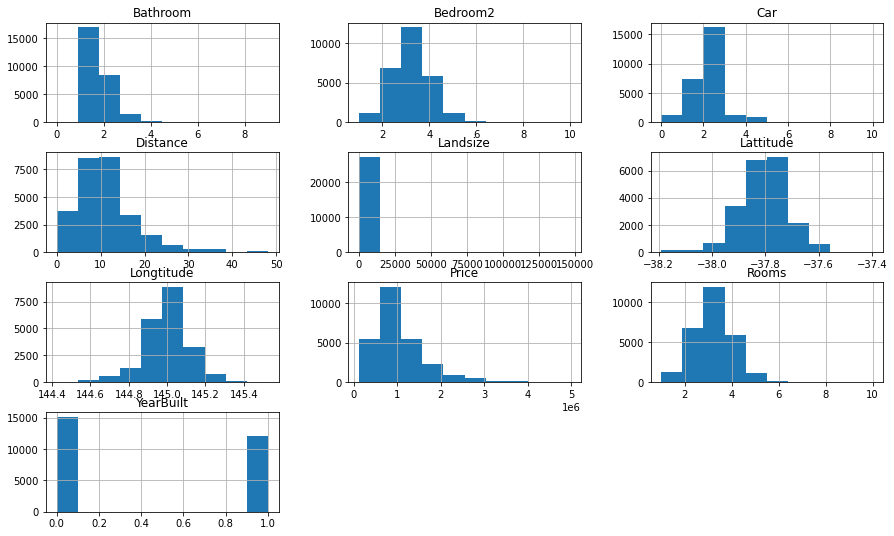

In [57]:
# Take an overview about the data distribution 
df.hist(figsize=(15, 9));

In [58]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,2016-03-12,2.50,3067.00,2,1,1,202.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,2016-04-02,2.50,3067.00,2,1,0,156.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,2017-04-03,2.50,3067.00,3,2,0,134.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,2017-04-03,2.50,3067.00,3,2,1,94.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,2016-04-06,2.50,3067.00,3,1,2,120.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


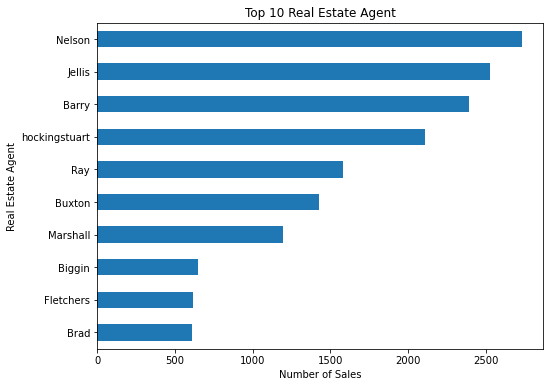

In [59]:
x = df.SellerG.value_counts()
x1 = x.head(10)
x1.sort_values().plot(kind='barh', figsize = (8,6));
plt.title('Top 10 Real Estate Agent', fontsize = 12)
plt.ylabel('Real Estate Agent');
plt.xlabel('Number of Sales');

We can see **Nelson** is the most seller have more than 2500 (*9.2%*) houses. And we can observe from that the maximum contribution is *9.2%* and that because we have many **Suburb** as well as the agents.

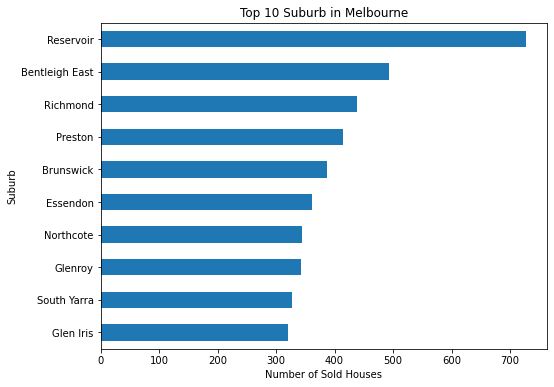

In [60]:
z = df.Suburb.value_counts()
z1 = z.head(10)
z1.sort_values().plot(kind='barh', figsize = (8,6));
plt.title('Top 10 Suburb in Melbourne', fontsize = 12)
plt.ylabel('Suburb');
plt.xlabel('Number of Sold Houses');

We can see that the **Reservoir** is the highest sales which was expected since its in the center of Melbourne and near from popular places e.g. **Edwardes Lake Park** and J.E. Moore Park.

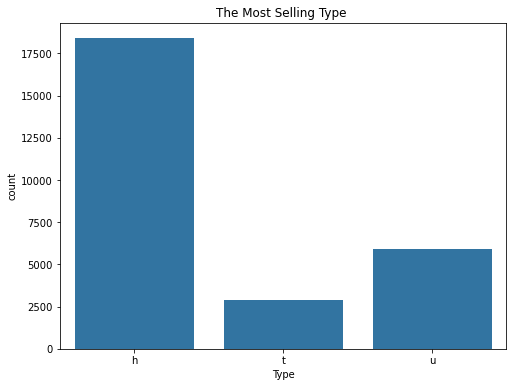

In [61]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 6]);
sb.countplot(data = df, x = 'Type', color = color);
plt.title('The Most Selling Type ', fontsize = 12);

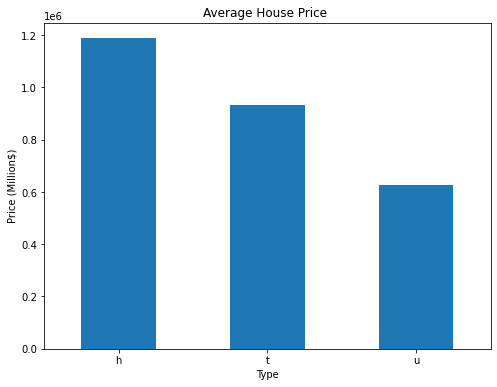

In [62]:
df.groupby('Type').Price.mean().plot(kind='bar', figsize = (8,6))
plt.title('Average House Price ', fontsize = 12)
plt.xlabel('Type');
plt.ylabel('Price (Million$)');
plt.xticks(rotation=1);

The most selling type and the highest average price is **h** (house, cottage, villa, semi, and terrace), and the lowest selling is type **t** (townhouse) but is the average price is higher. And that could be because its rare kind of houses.

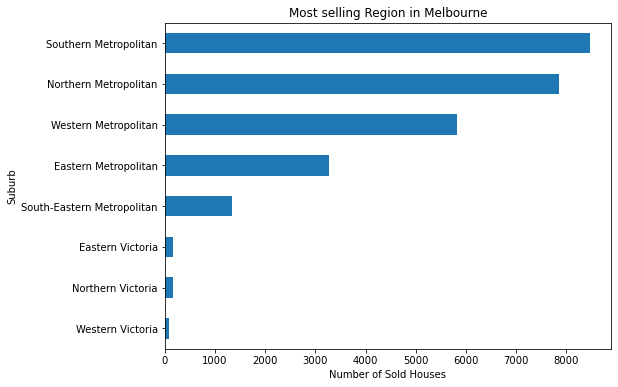

In [94]:
y = df.Regionname.value_counts()
y1 = y.head(10)
y1.sort_values().plot(kind='barh', figsize = (8,6));
plt.title('Most selling Region in Melbourne', fontsize = 12)
plt.ylabel('Suburb');
plt.xlabel('Number of Sold Houses');

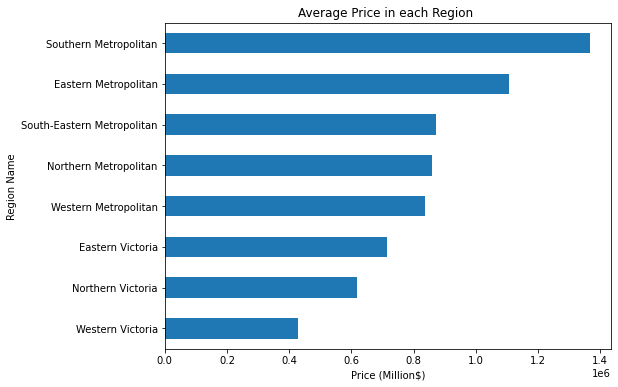

In [64]:
df.groupby('Regionname').Price.mean().sort_values(ascending=True).plot(kind='barh', figsize = (8,6))
plt.title('Average Price in each Region ', fontsize = 12)
plt.xlabel('Price (Million$)');
plt.ylabel('Region Name');

In [93]:
df.groupby('Regionname').Price.mean()

Regionname
Eastern Metropolitan         1107534.15
Eastern Victoria              714328.20
Northern Metropolitan         859344.85
Northern Victoria             619051.20
South-Eastern Metropolitan    871621.25
Southern Metropolitan        1366826.77
Western Metropolitan          837753.33
Western Victoria              429686.84
Name: Price, dtype: float64

The **Southern Metropolitan** has the most sold house and the highest average price its around 1.4 million, So its has a higher demand even though the average price is high, and that could be because it near to the Garden and Rottnest Island and I think this is an important factor that could affects the prices. and **Eastern Metropolitan** has highest prices around 1.1 million but with low demand and that becasue its near to the airport and the services and its could contain a lot of type t. **Victoria's** has the lowest price and demand.

In [65]:
# Create a new column that shows the year of the selling and the month 
df["Year"] = df["Date"].apply(lambda x:x.year)
df.head()

<ipython-input-65-77ba54864fd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Date"].apply(lambda x:x.year)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,2016-03-12,2.50,3067.00,...,1,1,202.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,2016-04-02,2.50,3067.00,...,1,0,156.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,2017-04-03,2.50,3067.00,...,2,0,134.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2017
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,2017-04-03,2.50,3067.00,...,2,1,94.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2017
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,2016-04-06,2.50,3067.00,...,1,2,120.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016


In [66]:
df["Year_month"] = df["Date"].apply(lambda x: '%04d-%02d' % (pd.to_datetime(x).year,pd.to_datetime(x).month))
df.head()

<ipython-input-66-a6c94bb0477d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year_month"] = df["Date"].apply(lambda x: '%04d-%02d' % (pd.to_datetime(x).year,pd.to_datetime(x).month))


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Year_month
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,2016-03-12,2.50,3067.00,...,1,202.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2016,2016-03
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,2016-04-02,2.50,3067.00,...,0,156.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016,2016-04
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,2017-04-03,2.50,3067.00,...,0,134.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2017,2017-04
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,2017-04-03,2.50,3067.00,...,1,94.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2017,2017-04
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,2016-04-06,2.50,3067.00,...,2,120.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016,2016-04


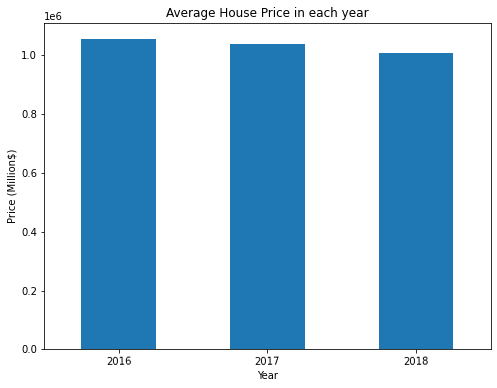

In [67]:
df.groupby('Year').Price.mean().plot(kind='bar', figsize = (8,6))
plt.title('Average House Price in each year', fontsize = 12)
plt.xlabel('Year');
plt.ylabel('Price (Million$)');
plt.xticks(rotation=1);

In [69]:
df.Year.value_counts()

2017    15475
2016     8040
2018     3665
Name: Year, dtype: int64

We can notice that the average price is decreasing a little bit year over year about *-2.27%*. 
Its could be affected the average price in **2018** since there are not enough data to get a better measurement. 

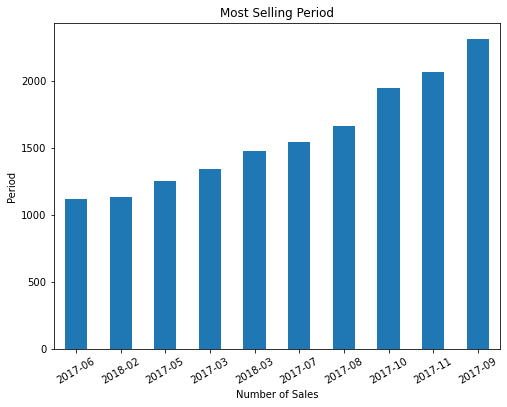

In [70]:
x = df.Year_month.value_counts()
x1 = x.head(10)
x1.sort_values().plot(kind='bar', figsize = (8,6));
plt.title('Most Selling Period', fontsize = 12)
plt.ylabel('Period');
plt.xlabel('Number of Sales');
plt.xticks(rotation=30);

Most the houses are sold in **September 2017** and We can notice that most of them are in **2017** and that expected because almost *57%* of the houses are sold in **2017**.

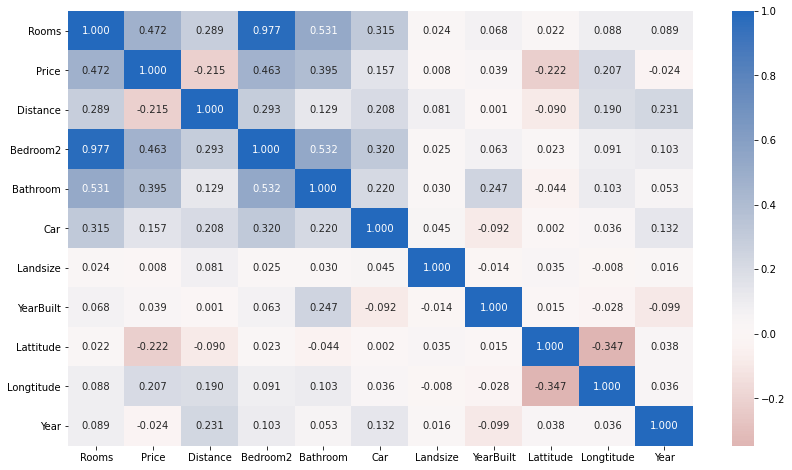

In [71]:
plt.figure(figsize = [14, 8])
sb.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

<Figure size 576x432 with 0 Axes>

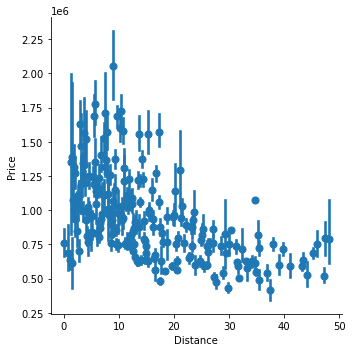

In [95]:
plt.figure(figsize = [8, 6]);
sb.lmplot(x="Distance", y="Price", data=df, x_estimator=np.mean, fit_reg = False);

We find that we have the negative relationship between that **Distance** and **Price** which was unexpected since the distance is matter in a lot of places, and its an important factor that affect the price.

In [73]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Year_month
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,2016-03-12,2.50,3067.00,...,1,202.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2016,2016-03
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,2016-04-02,2.50,3067.00,...,0,156.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016,2016-04
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,2017-04-03,2.50,3067.00,...,0,134.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2017,2017-04
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,2017-04-03,2.50,3067.00,...,1,94.00,0,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2017,2017-04
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,2016-04-06,2.50,3067.00,...,2,120.00,1,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016,2016-04


### Modeling 

In [74]:
# Make a copy of the dataframe to build your linear regression model
new_df = df.copy()

In [75]:
new_df.Method.value_counts()

S     17478
SP     3598
PI     3243
VB     2671
SA      190
W         0
SS        0
SN        0
PN        0
Name: Method, dtype: int64

In [76]:
# Must convert categorical variables to dummy variables 
new_df[['h', 'u', 't']] = pd.get_dummies(new_df['Type'])
new_df[['S', 'SP', 'PI', 'VB', 'SA', 'W', 'SS', 'SN', 'PN']] = pd.get_dummies(new_df['Method'])
new_df[['Southern Metropolitan', 'Northern Metropolitan', 'Western Metropolitan', 
        'Eastern Metropolitan', 'South-Eastern Metropolitan', 'Northern Victoria',
        'Eastern Victoria', 'Western Victoria']] = pd.get_dummies(new_df['Regionname'])

new_df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,SN,PN,Southern Metropolitan,Northern Metropolitan,Western Metropolitan,Eastern Metropolitan,South-Eastern Metropolitan,Northern Victoria,Eastern Victoria,Western Victoria
22979,Box Hill,13 Cunningham St,5,h,1900000.00,PI,Buxton,2017-08-26,10.90,3128.00,...,0,0,1,0,0,0,0,0,0,0
32874,Strathmore Heights,31 Caravelle Cr,4,h,1270000.00,S,Frank,2018-02-17,8.20,3041.00,...,0,0,0,0,0,0,0,0,1,0
25310,Preston,2 Showers St,2,h,869000.00,S,hockingstuart,2017-10-21,8.40,3072.00,...,0,0,0,0,1,0,0,0,0,0
18075,Greensborough,8 Omaru Ri,3,h,821000.00,S,Darren,2017-12-08,16.10,3088.00,...,0,0,0,0,1,0,0,0,0,0
22562,Malvern,101 Stanhope St,3,h,2500000.00,VB,Marshall,2017-09-23,5.90,3144.00,...,1,0,0,0,0,0,0,1,0,0
20323,Ascot Vale,18 Ascot St,3,h,870000.00,PI,Nelson,2017-09-09,4.30,3032.00,...,0,0,0,0,0,0,0,0,1,0
9715,Strathmore,34 Lind St,4,t,995000.00,SP,Nelson,2017-03-18,9.70,3041.00,...,0,0,0,0,0,0,0,0,1,0
19234,Werribee,17 Xavier Ct,4,h,510000.00,SP,YPA,2017-07-22,14.70,3030.00,...,0,0,0,0,0,0,0,0,1,0
31663,Deepdene,2/11 Peverill St,3,u,862500.00,S,Garvey,2018-03-03,7.90,3103.00,...,0,0,0,0,0,0,0,1,0,0
20261,Thornbury,316 Rossmoyne St,3,h,1375000.00,S,McGrath,2017-03-09,7.00,3071.00,...,0,0,0,0,1,0,0,0,0,0


In [77]:
new_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Year', 'Year_month', 'h', 'u', 't', 'S',
       'SP', 'PI', 'VB', 'SA', 'W', 'SS', 'SN', 'PN', 'Southern Metropolitan',
       'Northern Metropolitan', 'Western Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria',
       'Western Victoria'],
      dtype='object')

In [78]:
# We will drop the columns in the new df that we don't need in our model  
new_df.drop(columns=['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Type', 'Regionname',
                      'CouncilArea', 'Lattitude', 'Longtitude'], axis=1, inplace=True)

In [79]:
new_df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount,...,SN,PN,Southern Metropolitan,Northern Metropolitan,Western Metropolitan,Eastern Metropolitan,South-Eastern Metropolitan,Northern Victoria,Eastern Victoria,Western Victoria
1,2,1480000.00,2.50,3067.00,2,1,1,202.00,0,4019.00,...,0,0,0,0,1,0,0,0,0,0
2,2,1035000.00,2.50,3067.00,2,1,0,156.00,1,4019.00,...,0,0,0,0,1,0,0,0,0,0
4,3,1465000.00,2.50,3067.00,3,2,0,134.00,1,4019.00,...,0,0,0,0,1,0,0,0,0,0
5,3,850000.00,2.50,3067.00,3,2,1,94.00,0,4019.00,...,0,0,0,0,1,0,0,0,0,0
6,4,1600000.00,2.50,3067.00,3,1,2,120.00,1,4019.00,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.00,6.30,3013.00,4,1,3,593.00,0,6543.00,...,0,0,0,0,0,0,0,0,1,0
34853,2,888000.00,6.30,3013.00,2,2,1,98.00,1,6543.00,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.00,6.30,3013.00,2,1,2,220.00,1,6543.00,...,0,0,0,0,0,0,0,0,1,0
34855,3,1140000.00,6.30,3013.00,3,1,2,593.49,0,6543.00,...,0,0,0,0,0,0,0,0,1,0


In [80]:
# Check if there is any null values 
new_df.isnull().sum()

Rooms                         0
Price                         0
Distance                      0
Postcode                      0
Bedroom2                      0
Bathroom                      0
Car                           0
Landsize                      0
YearBuilt                     0
Propertycount                 2
Year                          0
Year_month                    0
h                             0
u                             0
t                             0
S                             0
SP                            0
PI                            0
VB                            0
SA                            0
W                             0
SS                            0
SN                            0
PN                            0
Southern Metropolitan         0
Northern Metropolitan         0
Western Metropolitan          0
Eastern Metropolitan          0
South-Eastern Metropolitan    0
Northern Victoria             0
Eastern Victoria              0
Western 

In [81]:
# Drop any null value 
new_df.dropna(axis=0, inplace=True)

In [82]:
new_df.shape

(27178, 32)

In [83]:
# Create independent variables
X = new_df[['Rooms', 'Distance', 'Bathroom','Car', 'h', 'u', 't', 
            'Southern Metropolitan', 'Northern Metropolitan', 'Western Metropolitan', 
            'Eastern Metropolitan', 'South-Eastern Metropolitan', 'Northern Victoria',
            'Eastern Victoria', 'Western Victoria', 'Propertycount', 'Postcode',
           'S', 'SP', 'PI', 'VB', 'SA', 'W', 'SS', 'SN', 'PN', 'YearBuilt', 'Landsize']]


# Create dependent variables
y = new_df['Price']



In [84]:
X.head()

,Rooms,Distance,Bathroom,Car,h,u,t,Southern Metropolitan,Northern Metropolitan,Western Metropolitan,...,SP,PI,VB,SA,W,SS,SN,PN,YearBuilt,Landsize
1,2,2.50,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,202.00
2,2,2.50,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,156.00
4,3,2.50,2,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,134.00
5,3,2.50,2,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,94.00
6,4,2.50,1,2,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,120.00


In [85]:
y.head()

1   1480000.00
2   1035000.00
4   1465000.00
5    850000.00
6   1600000.00
Name: Price, dtype: float64

In [86]:
#Splitting the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [87]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [88]:
# create linear Regression model
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) #fit

LinearRegression(normalize=True)

In [89]:
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 

In [90]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print("The R squared on the Training set was {} and in the Testing set was {}.".format(train_score, test_score))

The R squared on the Training set was 0.5870281211688864 and in the Testing set was 0.5926432229407813.


### Conclusion
After we clean the data we took a look at Melbourne Housing Data which had a lot of useful insights:

- Nelson sold more than 2500 houses and contribute 9.2% of all sold houses in Melbourne.
- We found out that Reservoir is the highest sales 2.68% of the total sales.
- Type h had most selling and highest average price i and the lowest selling is type t but is the average price is higher. 
- The Southern Metropolitan has the most sold house and the highest average price its around 1.4 million. and Eastern Metropolitan has highest prices around 1.1 million but with low demand.
- We -2.27% .year over year average price decreasing and Its could be affected the average price in 2018 since its had low data, and most the houses are sold in September 2017.
- We findout that we have the negative relationship between that Distance and Price..
Finally, we build a linear regression algorithm model using sklearn library to predict the houses price.

### References
- https://scikit-learn.org/stable/
- https://pandas.pydata.org/pandas-docs/stable/index.html
- https://stackoverflow.com/questions/52040142/get-an-error-message-that-says-cannot-convert-non-finite-values-na-or-inf-to?noredirect=1&lq=1